<a href="https://colab.research.google.com/github/zahrabatool487/AI-data-science-internship-task04/blob/main/Task_4_Credit_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LOAN PREDICTION SYSTEM

1. Loading and preprocessing data...
Dataset loaded successfully!
Shape: (614, 13)

Columns: ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']

Missing values in each column:
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

2. Handling missing values...

3. Creating visualizations...

Generating visualizations...
Visualizations saved as 'loan_analysis.png'


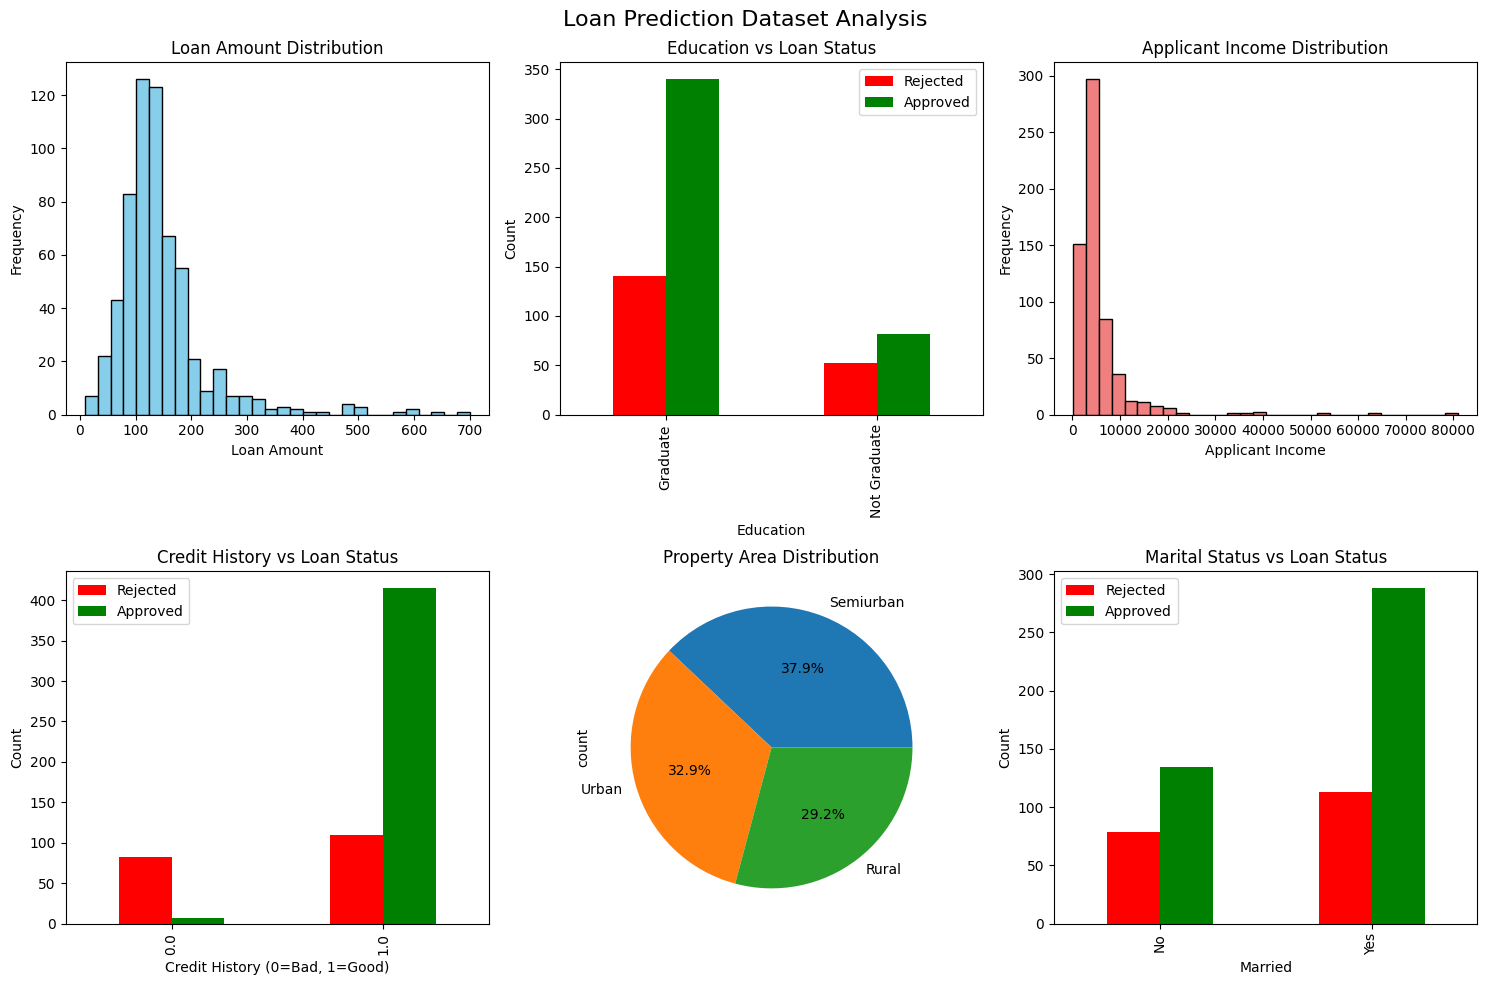


4. Preparing data for machine learning...

5. Training and evaluating models...

Training Logistic Regression...

Logistic Regression Results:
Accuracy: 0.8618

Confusion Matrix:
[[22 16]
 [ 1 84]]

Classification Report:
              precision    recall  f1-score   support

    Rejected       0.96      0.58      0.72        38
    Approved       0.84      0.99      0.91        85

    accuracy                           0.86       123
   macro avg       0.90      0.78      0.81       123
weighted avg       0.88      0.86      0.85       123

Confusion matrix saved as 'confusion_matrix_logistic.png'


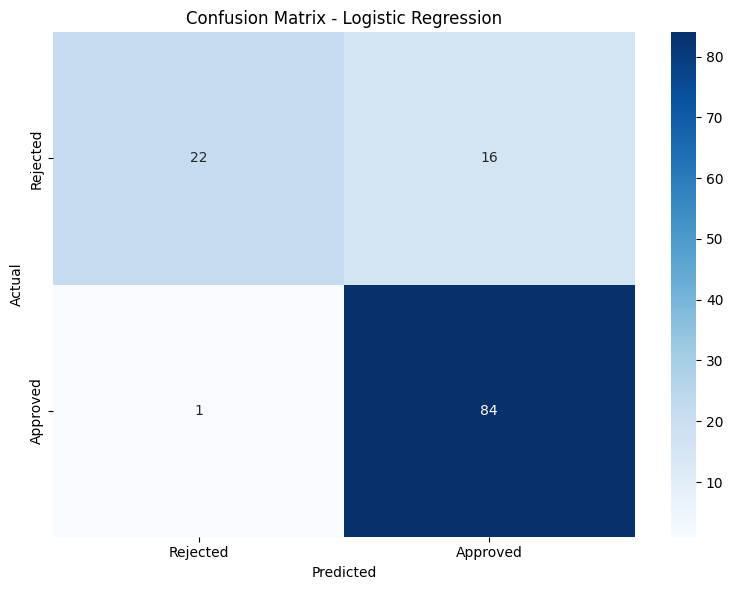


Training Decision Tree...

Decision Tree Results:
Accuracy: 0.8211

Confusion Matrix:
[[21 17]
 [ 5 80]]

Classification Report:
              precision    recall  f1-score   support

    Rejected       0.81      0.55      0.66        38
    Approved       0.82      0.94      0.88        85

    accuracy                           0.82       123
   macro avg       0.82      0.75      0.77       123
weighted avg       0.82      0.82      0.81       123

Confusion matrix saved as 'confusion_matrix_tree.png'


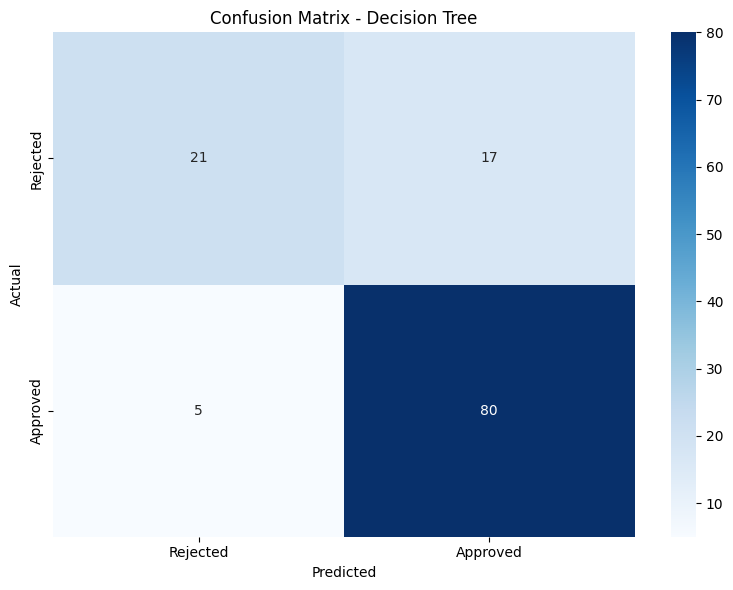


✓ Selected Logistic Regression model (Accuracy: 0.8618)

LOAN PREDICTION INTERFACE

ENTER LOAN APPLICANT DETAILS

Please enter the following details:

Gender (Enter M for Male, F for Female):
> f

Married (Enter Y for Yes, N for No):
> n

Number of Dependents (Enter 0, 1, 2, or 3+):
> 2

Education (Enter G for Graduate, NG for Not Graduate):
> g

Self Employed (Enter Y for Yes, N for No):
> n

Applicant Income (in ₹):
> 2699

Co-applicant Income (in ₹):
> 0

Loan Amount (in thousands ₹):
> 68

Loan Amount Term (in months - typical values: 12, 36, 60, 84, 120, 180, 240, 300, 360, 480):
> 67

Credit History (Enter 1 for Good, 0 for Bad):
> 1

Property Area (Enter U for Urban, S for Semiurban, R for Rural):
> u

ENTERED VALUES:
Gender: Female
Married: No
Dependents: 2
Education: Graduate
Self Employed: No
Applicant Income: ₹2,699.00
Co-applicant Income: ₹0.00
Loan Amount: ₹68.00
Loan Term: 67.0 months
Credit History: Good
Property Area: Urban

PREDICTION RESULT

✅ LOAN APPROVED!
Approval

In [2]:
## Task 4: Credit Risk Prediction

# Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Load and preprocess data
def load_and_preprocess_data():
    # Read the CSV data
    data = pd.read_csv('loan_prediction.csv')

    print("Dataset loaded successfully!")
    print(f"Shape: {data.shape}")
    print(f"\nColumns: {list(data.columns)}")

    # Drop Loan_ID as it's not useful for prediction
    data = data.drop('Loan_ID', axis=1)

    # Display missing values
    print("\nMissing values in each column:")
    print(data.isnull().sum())

    return data

def handle_missing_values(data):
    # Create a copy
    df = data.copy()

    # Separate numerical and categorical columns
    numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
                     'Loan_Amount_Term', 'Credit_History']
    categorical_cols = ['Gender', 'Married', 'Dependents', 'Education',
                       'Self_Employed', 'Property_Area']

    # Handle numerical missing values (median imputation)
    for col in numerical_cols:
        if col in df.columns and df[col].isnull().sum() > 0:
            median_val = df[col].median()
            df[col] = df[col].fillna(median_val)

    # Handle categorical missing values (mode imputation)
    for col in categorical_cols:
        if col in df.columns and df[col].isnull().sum() > 0:
            mode_val = df[col].mode()[0]
            df[col] = df[col].fillna(mode_val)

    return df

def visualize_data(df):
    print("\nGenerating visualizations...")

    # Create figure with subplots
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    fig.suptitle('Loan Prediction Dataset Analysis', fontsize=16)

    # 1. Loan Amount Distribution
    axes[0, 0].hist(df['LoanAmount'].dropna(), bins=30, color='skyblue', edgecolor='black')
    axes[0, 0].set_title('Loan Amount Distribution')
    axes[0, 0].set_xlabel('Loan Amount')
    axes[0, 0].set_ylabel('Frequency')

    # 2. Education vs Loan Status
    education_status = pd.crosstab(df['Education'], df['Loan_Status'])
    education_status.plot(kind='bar', ax=axes[0, 1], color=['red', 'green'])
    axes[0, 1].set_title('Education vs Loan Status')
    axes[0, 1].set_xlabel('Education')
    axes[0, 1].set_ylabel('Count')
    axes[0, 1].legend(['Rejected', 'Approved'])

    # 3. Applicant Income Distribution
    axes[0, 2].hist(df['ApplicantIncome'], bins=30, color='lightcoral', edgecolor='black')
    axes[0, 2].set_title('Applicant Income Distribution')
    axes[0, 2].set_xlabel('Applicant Income')
    axes[0, 2].set_ylabel('Frequency')

    # 4. Credit History vs Loan Status
    credit_status = pd.crosstab(df['Credit_History'], df['Loan_Status'])
    credit_status.plot(kind='bar', ax=axes[1, 0], color=['red', 'green'])
    axes[1, 0].set_title('Credit History vs Loan Status')
    axes[1, 0].set_xlabel('Credit History (0=Bad, 1=Good)')
    axes[1, 0].set_ylabel('Count')
    axes[1, 0].legend(['Rejected', 'Approved'])

    # 5. Property Area Distribution
    df['Property_Area'].value_counts().plot(kind='pie', ax=axes[1, 1], autopct='%1.1f%%')
    axes[1, 1].set_title('Property Area Distribution')

    # 6. Married vs Loan Status
    married_status = pd.crosstab(df['Married'], df['Loan_Status'])
    married_status.plot(kind='bar', ax=axes[1, 2], color=['red', 'green'])
    axes[1, 2].set_title('Marital Status vs Loan Status')
    axes[1, 2].set_xlabel('Married')
    axes[1, 2].set_ylabel('Count')
    axes[1, 2].legend(['Rejected', 'Approved'])

    plt.tight_layout()
    plt.savefig('loan_analysis.png', dpi=100, bbox_inches='tight')
    print("Visualizations saved as 'loan_analysis.png'")
    plt.show()

def preprocess_for_model(df):
    # Convert Loan_Status to binary (Y=1, N=0)
    df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})

    # Encode categorical variables
    categorical_cols = ['Gender', 'Married', 'Dependents', 'Education',
                       'Self_Employed', 'Property_Area']

    label_encoders = {}
    for col in categorical_cols:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

    # Prepare features and target
    X = df.drop('Loan_Status', axis=1)
    y = df['Loan_Status']

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # Scale numerical features
    scaler = StandardScaler()
    numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
                     'Loan_Amount_Term', 'Credit_History']

    X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
    X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

    return X_train, X_test, y_train, y_test, label_encoders, scaler

def train_and_evaluate_model(X_train, X_test, y_train, y_test, model_type='logistic'):
    if model_type == 'logistic':
        model = LogisticRegression(random_state=42, max_iter=1000)
        model_name = "Logistic Regression"
    else:  # decision tree
        model = DecisionTreeClassifier(random_state=42, max_depth=5)
        model_name = "Decision Tree"

    print(f"\nTraining {model_name}...")
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Classification report
    report = classification_report(y_test, y_pred, target_names=['Rejected', 'Approved'])

    print(f"\n{model_name} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print("\nConfusion Matrix:")
    print(cm)
    print("\nClassification Report:")
    print(report)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Rejected', 'Approved'],
                yticklabels=['Rejected', 'Approved'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.tight_layout()
    plt.savefig(f'confusion_matrix_{model_type}.png', dpi=100)
    print(f"Confusion matrix saved as 'confusion_matrix_{model_type}.png'")
    plt.show()

    return model, accuracy

def get_user_input(label_encoders):
    print("\n" + "="*60)
    print("ENTER LOAN APPLICANT DETAILS")
    print("="*60)

    # Define categorical mappings for user reference
    gender_map = {'M': 'Male', 'F': 'Female'}
    married_map = {'Y': 'Yes', 'N': 'No'}
    dependents_map = {'0': '0', '1': '1', '2': '2', '3+': '3+'}
    education_map = {'G': 'Graduate', 'NG': 'Not Graduate'}
    employed_map = {'Y': 'Yes', 'N': 'No'}
    property_map = {'U': 'Urban', 'S': 'Semiurban', 'R': 'Rural'}

    print("\nPlease enter the following details:")

    # Gender
    print("\nGender (Enter M for Male, F for Female):")
    gender_input = input("> ").strip().upper()
    while gender_input not in ['M', 'F']:
        print("Invalid input! Please enter M or F:")
        gender_input = input("> ").strip().upper()
    gender = label_encoders['Gender'].transform([gender_map[gender_input]])[0]

    # Married
    print("\nMarried (Enter Y for Yes, N for No):")
    married_input = input("> ").strip().upper()
    while married_input not in ['Y', 'N']:
        print("Invalid input! Please enter Y or N:")
        married_input = input("> ").strip().upper()
    married = label_encoders['Married'].transform([married_map[married_input]])[0]

    # Dependents
    print("\nNumber of Dependents (Enter 0, 1, 2, or 3+):")
    dependents_input = input("> ").strip()
    while dependents_input not in ['0', '1', '2', '3+']:
        print("Invalid input! Please enter 0, 1, 2, or 3+:")
        dependents_input = input("> ").strip()
    dependents = label_encoders['Dependents'].transform([dependents_input])[0]

    # Education
    print("\nEducation (Enter G for Graduate, NG for Not Graduate):")
    education_input = input("> ").strip().upper()
    while education_input not in ['G', 'NG']:
        print("Invalid input! Please enter G or NG:")
        education_input = input("> ").strip().upper()
    education = label_encoders['Education'].transform([education_map[education_input]])[0]

    # Self Employed
    print("\nSelf Employed (Enter Y for Yes, N for No):")
    employed_input = input("> ").strip().upper()
    while employed_input not in ['Y', 'N']:
        print("Invalid input! Please enter Y or N:")
        employed_input = input("> ").strip().upper()
    self_employed = label_encoders['Self_Employed'].transform([employed_map[employed_input]])[0]

    # Numerical inputs
    print("\nApplicant Income (in ₹):")
    applicant_income = float(input("> ").strip())

    print("\nCo-applicant Income (in ₹):")
    coapplicant_income = float(input("> ").strip())

    print("\nLoan Amount (in thousands ₹):")
    loan_amount = float(input("> ").strip())

    print("\nLoan Amount Term (in months - typical values: 12, 36, 60, 84, 120, 180, 240, 300, 360, 480):")
    loan_term = float(input("> ").strip())

    print("\nCredit History (Enter 1 for Good, 0 for Bad):")
    credit_history = int(input("> ").strip())
    while credit_history not in [0, 1]:
        print("Invalid input! Please enter 0 or 1:")
        credit_history = int(input("> ").strip())

    # Property Area
    print("\nProperty Area (Enter U for Urban, S for Semiurban, R for Rural):")
    property_input = input("> ").strip().upper()
    while property_input not in ['U', 'S', 'R']:
        print("Invalid input! Please enter U, S, or R:")
        property_input = input("> ").strip().upper()
    property_area = label_encoders['Property_Area'].transform([property_map[property_input]])[0]

    # Create feature array
    features = np.array([[gender, married, dependents, education, self_employed,
                          applicant_income, coapplicant_income, loan_amount,
                          loan_term, credit_history, property_area]])

    # Display entered values
    print("\n" + "="*60)
    print("ENTERED VALUES:")
    print("="*60)
    print(f"Gender: {gender_map[gender_input]}")
    print(f"Married: {married_map[married_input]}")
    print(f"Dependents: {dependents_input}")
    print(f"Education: {education_map[education_input]}")
    print(f"Self Employed: {employed_map[employed_input]}")
    print(f"Applicant Income: ₹{applicant_income:,.2f}")
    print(f"Co-applicant Income: ₹{coapplicant_income:,.2f}")
    print(f"Loan Amount: ₹{loan_amount:,.2f}")
    print(f"Loan Term: {loan_term} months")
    print(f"Credit History: {'Good' if credit_history == 1 else 'Bad'}")
    print(f"Property Area: {property_map[property_input]}")

    return features

def main():
    print("="*60)
    print("LOAN PREDICTION SYSTEM")
    print("="*60)

    # Step 1: Load and preprocess data
    print("\n1. Loading and preprocessing data...")
    data = load_and_preprocess_data()

    # Step 2: Handle missing values
    print("\n2. Handling missing values...")
    df_clean = handle_missing_values(data)

    # Step 3: Visualize data
    print("\n3. Creating visualizations...")
    visualize_data(df_clean)

    # Step 4: Prepare data for modeling
    print("\n4. Preparing data for machine learning...")
    X_train, X_test, y_train, y_test, label_encoders, scaler = preprocess_for_model(df_clean)

    # Step 5: Train and evaluate models
    print("\n5. Training and evaluating models...")

    # Train Logistic Regression
    logreg_model, logreg_accuracy = train_and_evaluate_model(
        X_train, X_test, y_train, y_test, 'logistic'
    )

    # Train Decision Tree
    tree_model, tree_accuracy = train_and_evaluate_model(
        X_train, X_test, y_train, y_test, 'tree'
    )

    # Select the best model
    if logreg_accuracy >= tree_accuracy:
        print(f"\n✓ Selected Logistic Regression model (Accuracy: {logreg_accuracy:.4f})")
        best_model = logreg_model
    else:
        print(f"\n✓ Selected Decision Tree model (Accuracy: {tree_accuracy:.4f})")
        best_model = tree_model

    # Step 6: Interactive prediction
    print("\n" + "="*60)
    print("LOAN PREDICTION INTERFACE")
    print("="*60)

    while True:
        try:
            # Get user input
            user_features = get_user_input(label_encoders)

            # Scale the numerical features
            numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
                             'Loan_Amount_Term', 'Credit_History']
            user_features_df = pd.DataFrame(user_features, columns=X_train.columns)
            user_features_df[numerical_cols] = scaler.transform(user_features_df[numerical_cols])

            # Make prediction
            prediction = best_model.predict(user_features_df)
            probability = best_model.predict_proba(user_features_df)

            # Display result
            print("\n" + "="*60)
            print("PREDICTION RESULT")
            print("="*60)

            if prediction[0] == 1:
                print("\n LOAN APPROVED!")
                print(f"Approval Probability: {probability[0][1]*100:.2f}%")
                print(f"Rejection Probability: {probability[0][0]*100:.2f}%")
            else:
                print("\n LOAN REJECTED!")
                print(f"Rejection Probability: {probability[0][0]*100:.2f}%")
                print(f"Approval Probability: {probability[0][1]*100:.2f}%")

            print("\n" + "-"*60)

            # Ask if user wants to make another prediction
            print("\nDo you want to make another prediction? (Y/N):")
            continue_input = input("> ").strip().upper()

            if continue_input != 'Y':
                print("\nThank you for using the Loan Prediction System!")
                print("="*60)
                break

        except ValueError as e:
            print(f"\nError: Invalid input! Please try again. Details: {e}")
        except Exception as e:
            print(f"\nUnexpected error: {e}")
            break

if __name__ == "__main__":
    main()